In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import os
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
import future 
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
seed = 100
np.random.seed(seed)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model



C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
def accuracy(x,y):
    acc = 0
    for i in range(len(x)):
        if x[i,]==y[i,]:
            acc+=1
        else:
            acc+=0
    rate = acc/len(x)
    print('Accuracy rate is: ',rate)
    
    
def plot(image,ans):
    if len(image) > 10 | len(ans) > 10:
        print('TOO MANY PHOTOS IN ONE TIME!!')
        print('The maximum is 10 photos')
    for i in range(len(image)):
        plt.subplot(2,5,i+1)
        plt.imshow(image[i,...])
        plt.title(ans[i])

In [3]:
path=os.getcwd()+'\\DATA\\picture02' #PICTURE2
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)            

Images are all in read_images
(40000, 100, 100)


In [4]:
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()


y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

Shape of x_train is (32000,100,100,1)
Shape of x_test is (8000,100,100,1)
Shape of y_train is (32000,1)
Shape of y_test is (8000,1)
Shape of y_train is (32000,8)


# 已選好epoch=60

# epoch=60 batchsize=32

In [4]:

def VGG16(include_top=True,input_tensor=None, input_shape=(100,100,1),
          pooling='max',classes=1000):
    global model_p2_32
#     global model
    model_p2_32 = Sequential([
        Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
               activation='relu'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001), 
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(8,activation = 'softmax')
        ])
VGG16()

####################################################################################

tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf'))


model_p2_32.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

##Check points

# 將最高的那次紀錄下來，儲存在 "checkpoint30_record"的資料夾裡
# 檔名這裡 model_iter30_3.hdf5 要自己修改  30是epoch 3是第3次

filepath="C:\\Users\\user\\Desktop\\project\\VGG16_p2_batch\\model_iter32.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')
train_history_32 = model_p2_32.fit(x=x_train, y=y_train, validation_split=0.3, epochs=60, batch_size=32, verbose=2, shuffle = True, callbacks = [checkpoint , tensorboard])  
# train_history_30_3要修改 30是epoch ,3是第3次

#########################################################################

#把訓練結果(train_history_30_3)存成list 匯出去存在'train_history'的資料夾裡    

# 裡面有2個  train_history_30_3 要改,30是epoch ,3是第3次

# file='train_history的資料夾\train_history_30_3.lst'
                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\VGG16_p2_batch\train_history_32.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_32.history, outhis)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 22400 samples, validate on 9600 samples
Epoch 1/60

Epoch 00001: acc improved from -inf to 0.32973, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter32.hdf5
22400/22400 - 103s - loss: 1.7756 - acc: 0.3297 - val_loss: 3.4546 - val_acc: 0.1720
Epoch 2/60

Epoch 00002: acc improved from 0.32973 to 0.46165, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter32.hdf5
22400/22400 - 100s - loss: 1.3417 - acc: 0.4617 - val_loss: 1.7693 - val_acc: 0.3923
Epoch 3/60

Epoch 00003: acc improved from 0.46165 to 0.55571, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter32.hdf5
22400/22400 - 100s - loss: 1.0688 - acc: 0.5557 - val_loss: 3.0706 - val_acc: 0.4654
Epoch 4/60

Epoch 00004: acc improved from 0.55571 to 0.58763, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter32.hdf5
22400/22400 -

Epoch 38/60

Epoch 00038: acc did not improve from 0.86313
22400/22400 - 99s - loss: 0.2409 - acc: 0.8562 - val_loss: 1.2249 - val_acc: 0.8345
Epoch 39/60

Epoch 00039: acc improved from 0.86313 to 0.86504, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter32.hdf5
22400/22400 - 100s - loss: 0.2127 - acc: 0.8650 - val_loss: 1.1420 - val_acc: 0.8216
Epoch 40/60

Epoch 00040: acc did not improve from 0.86504
22400/22400 - 99s - loss: 0.2549 - acc: 0.8552 - val_loss: 0.7191 - val_acc: 0.8177
Epoch 41/60

Epoch 00041: acc did not improve from 0.86504
22400/22400 - 100s - loss: 0.2336 - acc: 0.8598 - val_loss: 0.4405 - val_acc: 0.8301
Epoch 42/60

Epoch 00042: acc improved from 0.86504 to 0.86790, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter32.hdf5
22400/22400 - 100s - loss: 0.2010 - acc: 0.8679 - val_loss: 0.3901 - val_acc: 0.8269
Epoch 43/60

Epoch 00043: acc did not improve from 0.86790
22400/22400 - 99s - loss: 0.2382 - acc: 0.8608 - val_lo

# epoch=60 batchsize=64

In [5]:
def VGG16(include_top=True,input_tensor=None, input_shape=(100,100,1),
          pooling='max',classes=1000):
    global model_p2_64
#     global model
    model_p2_64 = Sequential([
        Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
               activation='relu'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001), 
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(8,activation = 'softmax')
        ])
VGG16()

####################################################################################

tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf'))


model_p2_64.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

##Check points

# 將最高的那次紀錄下來，儲存在 "checkpoint30_record"的資料夾裡
# 檔名這裡 model_iter30_3.hdf5 要自己修改  30是epoch 3是第3次

filepath="C:\\Users\\user\\Desktop\\project\\VGG16_p2_batch\\model_iter64.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')
train_history_64 = model_p2_64.fit(x=x_train, y=y_train, validation_split=0.3, epochs=60, batch_size=64, verbose=2, shuffle = True, callbacks = [checkpoint , tensorboard])  
# train_history_30_3要修改 30是epoch ,3是第3次

#########################################################################

#把訓練結果(train_history_30_3)存成list 匯出去存在'train_history'的資料夾裡    

# 裡面有2個  train_history_30_3 要改,30是epoch ,3是第3次

# file='train_history的資料夾\train_history_30_3.lst'
                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\VGG16_p2_batch\train_history_64.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_64.history, outhis)

Train on 22400 samples, validate on 9600 samples
Epoch 1/60

Epoch 00001: acc improved from -inf to 0.31839, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter64.hdf5
22400/22400 - 92s - loss: 1.9062 - acc: 0.3184 - val_loss: 2.8317 - val_acc: 0.2005
Epoch 2/60

Epoch 00002: acc improved from 0.31839 to 0.48321, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter64.hdf5
22400/22400 - 89s - loss: 1.2540 - acc: 0.4832 - val_loss: 1.1995 - val_acc: 0.5218
Epoch 3/60

Epoch 00003: acc improved from 0.48321 to 0.55937, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter64.hdf5
22400/22400 - 89s - loss: 1.0453 - acc: 0.5594 - val_loss: 2.3593 - val_acc: 0.3942
Epoch 4/60

Epoch 00004: acc improved from 0.55937 to 0.59183, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter64.hdf5
22400/22400 - 89s - loss: 0.9475 - acc: 0.5918 - val_loss: 1.3013 - val_acc: 0.5060
Epoch 5/60

Epoch 00005: acc improved from 0.59183

Epoch 42/60

Epoch 00042: acc improved from 0.87366 to 0.87478, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter64.hdf5
22400/22400 - 88s - loss: 0.1997 - acc: 0.8748 - val_loss: 1.3680 - val_acc: 0.7971
Epoch 43/60

Epoch 00043: acc did not improve from 0.87478
22400/22400 - 88s - loss: 0.2167 - acc: 0.8722 - val_loss: 0.4234 - val_acc: 0.8154
Epoch 44/60

Epoch 00044: acc improved from 0.87478 to 0.87558, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter64.hdf5
22400/22400 - 88s - loss: 0.2085 - acc: 0.8756 - val_loss: 0.4878 - val_acc: 0.8252
Epoch 45/60

Epoch 00045: acc improved from 0.87558 to 0.88232, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter64.hdf5
22400/22400 - 88s - loss: 0.2011 - acc: 0.8823 - val_loss: 0.3740 - val_acc: 0.8245
Epoch 46/60

Epoch 00046: acc did not improve from 0.88232
22400/22400 - 88s - loss: 0.2224 - acc: 0.8804 - val_loss: 0.3352 - val_acc: 0.8411
Epoch 47/60

Epoch 00047: acc imp

# epoch=60  batchsize=128

In [5]:
def VGG16(include_top=True,input_tensor=None, input_shape=(100,100,1),
          pooling='max',classes=1000):
    global model_p2_128
#     global model
    model_p2_128 = Sequential([
        Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
               activation='relu'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001), 
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(8,activation = 'softmax')
        ])
VGG16()

####################################################################################

tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf'))


model_p2_128.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

##Check points

# 將最高的那次紀錄下來，儲存在 "checkpoint30_record"的資料夾裡
# 檔名這裡 model_iter30_3.hdf5 要自己修改  30是epoch 3是第3次

filepath="C:\\Users\\user\\Desktop\\project\\VGG16_p2_batch\\model_iter128.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')
train_history_128 = model_p2_128.fit(x=x_train, y=y_train, validation_split=0.3, epochs=60, batch_size=128, verbose=2, shuffle = True, callbacks = [checkpoint , tensorboard])  
# train_history_30_3要修改 30是epoch ,3是第3次

#########################################################################

#把訓練結果(train_history_30_3)存成list 匯出去存在'train_history'的資料夾裡    

# 裡面有2個  train_history_30_3 要改,30是epoch ,3是第3次

# file='train_history的資料夾\train_history_30_3.lst'
                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\VGG16_p2_batch\train_history_128.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_128.history, outhis)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 22400 samples, validate on 9600 samples
Epoch 1/60

Epoch 00001: acc improved from -inf to 0.31723, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter128.hdf5
22400/22400 - 96s - loss: 2.1572 - acc: 0.3172 - val_loss: 3.0943 - val_acc: 0.1452
Epoch 2/60

Epoch 00002: acc improved from 0.31723 to 0.45246, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter128.hdf5
22400/22400 - 92s - loss: 1.3349 - acc: 0.4525 - val_loss: 2.4295 - val_acc: 0.3866
Epoch 3/60

Epoch 00003: acc improved from 0.45246 to 0.50826, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter128.hdf5
22400/22400 - 92s - loss: 1.1482 - acc: 0.5083 - val_loss: 1.6483 - val_acc: 0.4264
Epoch 4/60

Epoch 00004: acc improved from 0.50826 to 0.57527, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter128.hdf5
22400/22400 

Epoch 38/60

Epoch 00038: acc improved from 0.90134 to 0.91254, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter128.hdf5
22400/22400 - 92s - loss: 0.1802 - acc: 0.9125 - val_loss: 0.5954 - val_acc: 0.7822
Epoch 39/60

Epoch 00039: acc improved from 0.91254 to 0.91379, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter128.hdf5
22400/22400 - 92s - loss: 0.1810 - acc: 0.9138 - val_loss: 0.4660 - val_acc: 0.8265
Epoch 40/60

Epoch 00040: acc improved from 0.91379 to 0.92188, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter128.hdf5
22400/22400 - 92s - loss: 0.1669 - acc: 0.9219 - val_loss: 0.4658 - val_acc: 0.8192
Epoch 41/60

Epoch 00041: acc improved from 0.92188 to 0.93371, saving model to C:\Users\user\Desktop\project\VGG16_p2_batch\model_iter128.hdf5
22400/22400 - 92s - loss: 0.1508 - acc: 0.9337 - val_loss: 0.5813 - val_acc: 0.8006
Epoch 42/60

Epoch 00042: acc improved from 0.93371 to 0.94179, saving model to C:\Users

In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
dirpath=r'C:\Users\user\Desktop\project\VGG16_p2_batch\history\*.*' #train_history資料夾
filename=glob.glob(dirpath)
filename

['C:\\Users\\user\\Desktop\\project\\VGG16_p2_batch\\history\\train_history_128.lst',
 'C:\\Users\\user\\Desktop\\project\\VGG16_p2_batch\\history\\train_history_32.lst',
 'C:\\Users\\user\\Desktop\\project\\VGG16_p2_batch\\history\\train_history_64.lst']

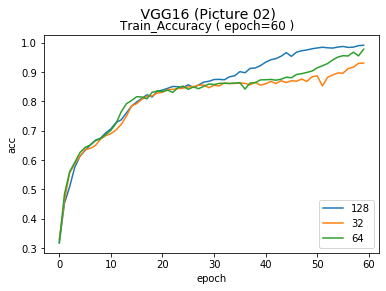

In [3]:
# train acc

label=(128,32,64)

for i in range(0,3):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['acc'],label=label[i])
        
    plt.xlabel('epoch') 
    plt.ylabel('acc')
    
    plt.suptitle(' VGG16 (Picture 02)',fontsize=14)    # 當有使用 plt.subplot， 總 title
    plt.title('Train_Accuracy ( epoch=60 )  ') #要改
    
    plt.legend(loc=4)
    
    
plt.savefig(r'C:\Users\user\Desktop\project\image04\train_acc_p2_vgg_batchsize.jpg')    #匯出到資料夾 
plt.show()

In [6]:
filename2

['C:\\Users\\user\\Desktop\\project\\VGG16_p2_batch\\model_iter128.hdf5',
 'C:\\Users\\user\\Desktop\\project\\VGG16_p2_batch\\model_iter32.hdf5',
 'C:\\Users\\user\\Desktop\\project\\VGG16_p2_batch\\model_iter64.hdf5']

In [5]:
dirpath1=r'C:\Users\user\Desktop\project\VGG16_p2_batch\*.*' 
filename2=glob.glob(dirpath1)
filename2
test_acc=[]
test_loss=[]

for i in range(0,3):
    
    tf.keras.backend.clear_session()
    model=load_model(filename2[i])
    a=model.evaluate(x=x_test,y=y_test)
  


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
8000/8000 [==============================] - 9s 1ms/sample - loss: 0.6019 - acc: 0.8375
